Initialization

In [126]:
import numpy as np
import matplotlib.pyplot as plt 

A = np.array([[0.9512,0],[0.0476,0.9512]])
B = np.array([[0.0975],[0.0024]])
C = np.array([0.,1.])
R = 0.0125
Q = 1e-3*np.array([[9.506,0.234],[0.234,9.512]])
y_data = open("Measured_output_linear_case.txt",'r').read().split("\n")[1:-1]

y = np.zeros(len(y_data), dtype='float')
for i in range(len(y_data)):
    y[i] = y_data[i][:-2]

Real state trajectories

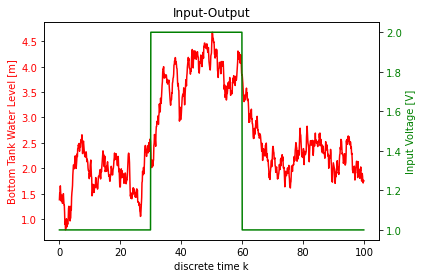

In [127]:

# plt.plot(0.1*np.arange(len(y)),y, '-r',label='Measured Output')
# #plt.show()

# u_data = open("Input_linear_case.txt",'r').read().split("\n")[1:-1]
# u = np.zeros(len(u_data), dtype='float')

# for i in range(len(u_data)):
#     u[i] = u_data[i][:-2]
# plt.plot(0.1*np.arange(len(u)),u,'-g', label='Input')
# plt.savefig("y.png")
# plt.legend()
# plt.xlabel('dsicrete time')
# plt.ylabel('Tank ')

# plt.show()


fig, ax1 = plt.subplots()
ax1.plot(0.1*np.arange(len(y)),y, '-r',label='Measured Output')
plt.xlabel("discrete time k")
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Bottom Tank Water Level [m]', color='r')
for tl in ax1.get_yticklabels():
    tl.set_color('r')

ax2 = ax1.twinx()
ax2.plot(0.1*np.arange(len(u)),u,'-g', label='Input')
ax2.set_ylabel('Input Voltage [V]', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')  
plt.title("Input-Output")

plt.savefig('IN_OUT.png') 
plt.show()

States graph

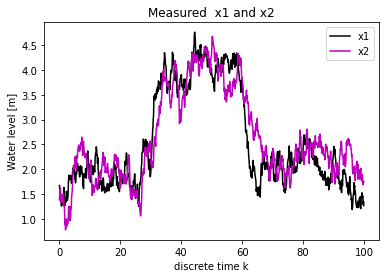

In [128]:
x1_data = open("True_state_x1_linear_case.txt",'r').read().split("\n")[1:-1]
x1 = np.zeros(len(x1_data), dtype='float')

for i in range(len(x1_data)):
    x1[i] = x1_data[i][:-2]
plt.plot(0.1*np.arange(len(x1)),x1, '-k', label='measured x1')

x2_data = open("True_state_x2_linear_case.txt",'r').read().split("\n")[1:-1]
x2 = np.zeros(len(x2_data), dtype='float')

for i in range(len(x2_data)):
    x2[i] = x2_data[i][:-2]
plt.plot(0.1*np.arange(len(x2)),x2,'-m', label='measured x2')
plt.legend()
plt.xlabel("discrete time k")
plt.ylabel('Water level [m]')
plt.title("Measured  x1 and x2")
plt.savefig('STATES.png')
plt.show()

#  KF

In [139]:
mu_k = np.zeros((len(y),2,1),dtype='float')
P_k = np.zeros((len(y),2,2),dtype='float')

mu_k[0] = np.random.normal(5.,1.,(2,1))
P_k[0] = np.array([[1.,0.],[0.,1.]])
for i in range(1,len(y)):
    mu_k_tilt = np.dot(A,mu_k[i-1])+B*u[i]
    P_k_tilt = np.dot(np.dot(A, P_k[i-1]),np.transpose(A)) + Q
    
    K_k = np.dot(P_k_tilt,np.reshape(C,(2,1)))/(np.dot(C,np.dot(P_k_tilt,np.reshape(C,(2,1))))[0] + R)
    K_kC = np.zeros((2,2),dtype='float')
    K_kC[0,0] = K_k[0,0]*C[0]
    K_kC[0,1] = K_k[0,0]*C[1]
    K_kC[1,0] = K_k[1,0]*C[0]
    K_kC[1,1] = K_k[1,0]*C[1]
    
    mu_k[i] = mu_k_tilt + K_k * (y[i] - np.dot(C, mu_k_tilt)[0])
    P_k[i] = P_k_tilt - np.dot(K_kC, P_k_tilt)
 
print(mu_k[0])   

[[4.39024023]
 [4.50359   ]]


Filtered Stated (Update)

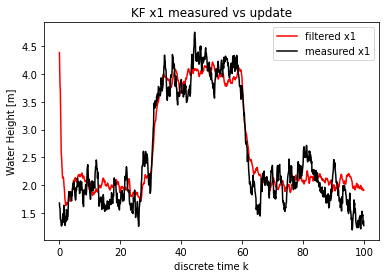

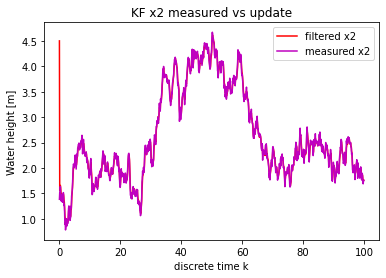

In [140]:
t = 0.1*np.arange(len(x2))

#1e graphe
# fig, ax = plt.subplots()
plt.plot(t, mu_k[:,0,0], '-r',label="filtered x1")
# ax.fill_between(t, mu_k[:,0,0]-1.96*(P_k[:,0,0]**0.5), mu_k[:,0,0]+1.96*(P_k[:,0,0]**0.5) ,alpha=0.3)
plt.plot(t, x1, 'k-',label="measured x1")
plt.legend()
plt.xlabel("discrete time k")
plt.ylabel('Water Height [m]')
plt.title("KF x1 measured vs update")
plt.savefig('KF_x1_update.png')
plt.show()

#2e graphe
# fig, ax = plt.subplots()
plt.plot(t, mu_k[:,1,0],'-r',label="filtered x2")
# ax.fill_between(t, mu_k[:,1,0]-1.96*(P_k[:,1,1]**0.5), mu_k[:,1,0]-1.96*(P_k[:,1,1]**0.5) ,alpha=0.3)
plt.plot(t, x2, 'm-',label="measured x2")
plt.legend()
plt.xlabel("discrete time k")
plt.ylabel('Water height [m]')
plt.title("KF x2 measured vs update")
plt.savefig('KF_x2_update.png')
plt.show()

# plt.semilogy(t, np.sqrt(((x1-mu_k[:,0,0])**2)+P_k[:,0,0]))
# plt.show()

# plt.semilogy(t, np.sqrt(((x2-mu_k[:,1,0])**2)+P_k[:,1,1]))
# plt.show()

95% confidence intervals

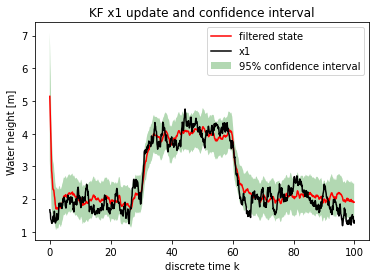

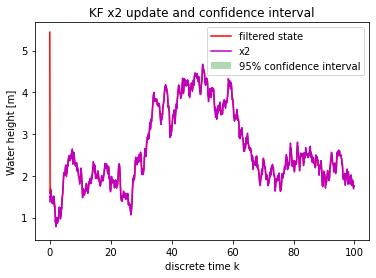

In [131]:
t = 0.1*np.arange(len(x2))

#1e graphe
# fig, ax = plt.subplots()
plt.plot(t, mu_k[:,0,0], '-r',label="filtered x1")
plt.fill_between(t, mu_k[:,0,0]-1.96*(P_k[:,0,0]**0.5), mu_k[:,0,0]+1.96*(P_k[:,0,0]**0.5) ,facecolor='green',alpha=0.3,label="95% confidence interval")
plt.plot(t, x1, 'k-',label="measured x1")
plt.legend()
plt.xlabel("discrete time k")
plt.ylabel('Water height [m]')
plt.title("KF x1 update and confidence interval")
plt.savefig('KF_x1_update_2.png')
plt.show()

#2e graphe
# fig, ax = plt.subplots()
plt.plot(t, mu_k[:,1,0],'-r',label="filtered x2")
plt.fill_between(t, mu_k[:,1,0]-1.96*(P_k[:,1,1]**0.5), mu_k[:,1,0]-1.96*(P_k[:,1,1]**0.5) ,facecolor='green',alpha=0.3,label="95% confidence interval")
plt.plot(t, x2, 'm-',label="measured x2")
plt.legend()
plt.xlabel("discrete time k")
plt.ylabel('Water height [m]')
plt.title("KF x2 update and confidence interval")
plt.savefig('KF_x2_update_2.png')
plt.show()



RMSD

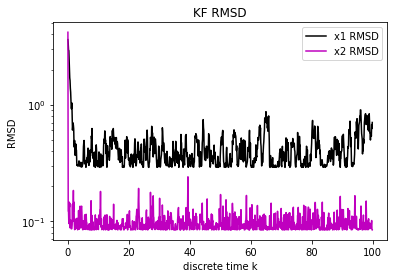

In [132]:
plt.plot(t, np.sqrt(((x1-mu_k[:,0,0])**2)+P_k[:,0,0]),'-k', label="x1 RMSD")
plt.plot(t, np.sqrt(((x2-mu_k[:,1,0])**2)+P_k[:,1,1]), '-m',label ="x2 RMSD")
plt.yscale("log")
plt.legend()
plt.title("KF RMSD")
plt.xlabel("discrete time k")
plt.ylabel('RMSD')
plt.savefig("KF_RMSD.png")
plt.show()

#  ENKF

In [150]:
N = 100 # EnKF sample number

mu_k = np.zeros((len(y),N,2,1),dtype='float')
P_k = np.zeros((len(y),2,2),dtype='float')

x = np.zeros((len(y),N,2,1))
x[0,:,:,:] = np.random.normal(5.,1.,(N,2,1))
for i in range(1,len(y)):
    for j in range(N):
        x[i,j] = np.dot(A,x[i-1,j]) + B*u[i] + np.reshape(np.random.multivariate_normal([0,0],Q,size=1), (2,1))
    
    x_for_cov = np.zeros((2,N),dtype='float')
    for k in range(N):
        x_for_cov[0,k] = x[i-1,k,0,0]
        x_for_cov[1,k] = x[i-1,k,1,0]
    P_k[i] = np.cov(x_for_cov)
        
    K_k = np.dot(P_k[i],np.reshape(C,(2,1)))/(np.dot(C,np.dot(P_k[i],np.reshape(C,(2,1))))[0] + R)
    K_kC = np.zeros((2,2),dtype='float')
    K_kC[0,0] = K_k[0,0]*C[0]
    K_kC[0,1] = K_k[0,0]*C[1]
    K_kC[1,0] = K_k[1,0]*C[0]
    K_kC[1,1] = K_k[1,0]*C[1]
    for j in range(N):
        x[i,j] = x[i,j] + K_k * (y[i] - np.dot(C, x[i,j])[0])

Update Step

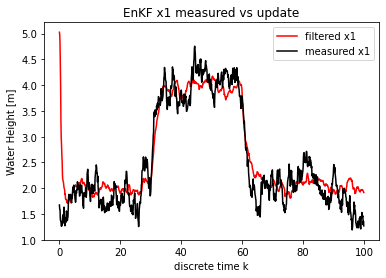

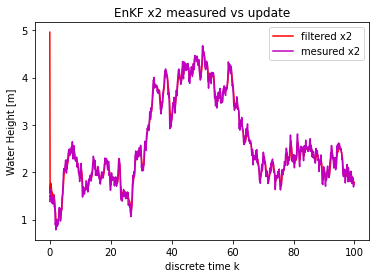

In [151]:
t = 0.1*np.arange(len(x2))

# for i in range(0,N):
#     plt.plot(t, x[:,i,0,0],alpha=0.6)

#plt.plot(t, np.sum(x[:,:,0,0],axis=1)/N)

plt.plot(t, np.sum(x[:,:,0,0],axis=1)/N,'-r',label="filtered x1")
plt.plot(t, x1, 'k-', label = "measured x1")
plt.xlabel("discrete time k")
plt.ylabel("Water Height [m]")
plt.legend()
plt.savefig("EnKF_x1_update.png")

plt.title("EnKF x1 measured vs update")
plt.show()



# for i in range(0,N):
#     plt.plot(t, x[:,i,1,0],alpha=0.6)

plt.plot(t, np.sum(x[:,:,1,0],axis=1)/N,'-r',label="filtered x2")
plt.plot(t, x2, 'm-', label = "mesured x2")
plt.xlabel("discrete time k")
plt.ylabel("Water Height [m]")
plt.legend()
plt.title("EnKF x2 measured vs update")
plt.savefig("EnKF_x2_update.png")
plt.show()

# plt.semilogy(t[:],P_k[:,0,0][:])
# plt.show()

# plt.semilogy(t[:],P_k[:,1,1][:])
# plt.show()

___95% confidence intervals___


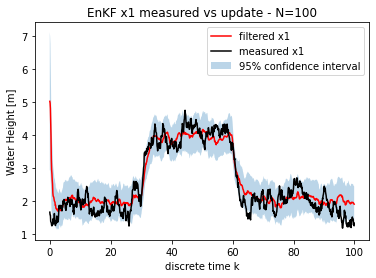

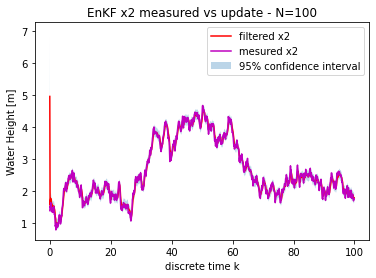

In [152]:
t = 0.1*np.arange(len(x2))

# for i in range(0,N):
#     plt.plot(t, x[:,i,0,0],alpha=0.6)

#plt.plot(t, np.sum(x[:,:,0,0],axis=1)/N)

plt.plot(t, np.sum(x[:,:,0,0],axis=1)/N,'-r',label="filtered x1")
plt.plot(t, x1, 'k-', label = "measured x1")
plt.fill_between(t, np.sum(x[:,:,0,0],axis=1)/N-1.96*np.std(x[:,:,0,0],axis=1), np.sum(x[:,:,0,0],axis=1)/N+1.96*np.std(x[:,:,0,0],axis=1) ,alpha=0.3,label="95% confidence interval")
plt.ylabel("Water Height [m]")
plt.xlabel("discrete time k")
plt.legend()
plt.title("EnKF x1 measured vs update - N=100")
plt.savefig("EnKF_x1_update2_N100.png")
plt.show()



# for i in range(0,N):
#     plt.plot(t, x[:,i,1,0],alpha=0.6)

plt.plot(t, np.sum(x[:,:,1,0],axis=1)/N,'-r',label="filtered x2")
plt.plot(t, x2, 'm-', label = "mesured x2")
plt.fill_between(t, np.sum(x[:,:,1,0],axis=1)/N-1.96*np.std(x[:,:,1,0],axis=1), np.sum(x[:,:,1,0],axis=1)/N+1.96*np.std(x[:,:,1,0],axis=1) ,alpha=0.3,label="95% confidence interval")
plt.xlabel("discrete time k")
plt.ylabel("Water Height [m]")
plt.legend()
plt.title("EnKF x2 measured vs update - N=100")
plt.savefig("EnKF_x2_update2_N100.png")
plt.show()

# plt.semilogy(t[:],P_k[:,0,0][:])
# plt.show()

# plt.semilogy(t[:],P_k[:,1,1][:])
# plt.show()

RMSD

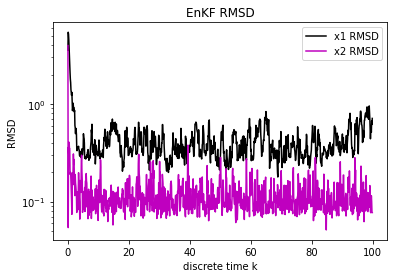

In [136]:
MSE1 = np.zeros(len(t),dtype='float')
MSE2 = np.zeros(len(t),dtype='float')
for i in range(len(MSE1)):
    MSE1[i] = np.sum((x[i,:,0,0]-x1[i])**2)/float(N)
    MSE2[i] = np.sum((x[i,:,1,0]-x2[i])**2)/float(N)

plt.plot(t, np.sqrt(MSE1),'-k', label="x1 RMSD")
plt.plot(t, np.sqrt(MSE2), '-m',label ="x2 RMSD")
plt.yscale("log")
plt.legend()
plt.title("EnKF RMSD")
plt.xlabel("discrete time k")
plt.ylabel('RMSD')
plt.savefig("EnKF_RMSD.png")
plt.show()


Ensemble size variation